<h1>Importarea modulelor

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


<h1>O vizualizare a setului de date

In [57]:
#df va vi setul nostru de date
df = pd.read_csv("ad_click_dataset.csv")
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [58]:
#informatii despre setul nostru de date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.2+ KB


In [59]:
#sumar statistic al setului nostru de date
df.describe(include= 'all')

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
count,10000.000000,10000,5234.000000,5307,8000,8000,5218,8000,10000.000000
unique,NaN,4000,NaN,3,3,3,5,4,NaN
top,NaN,User1171,NaN,Female,Desktop,Bottom,Entertainment,Morning,NaN
freq,NaN,25,NaN,1834,2754,2817,1175,2126,NaN
mean,5060.211400,NaN,40.197363,NaN,NaN,NaN,NaN,NaN,0.650000
std,2861.758265,NaN,13.126420,NaN,NaN,NaN,NaN,NaN,0.476993
min,5.000000,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,2529.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,5218.000000,NaN,39.500000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,7466.000000,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,1.000000


In [60]:
#verificare daca avem elemente lipsa in setul nostru de date
df.isnull().sum()

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [61]:
#observam ca exista elemente lipsa in setul nostru de date => le vom umple
coloane_numerice = df.select_dtypes(include = [np.number])
for col in coloane_numerice:
    df[col].fillna(df[col].median(), inplace = True)

coloane_obiect = df.select_dtypes(include = [np.object_])
for col in coloane_obiect:
    df[col].fillna(df[col].mode()[0], inplace = True)

/tmp/ipykernel_2391/2942466664.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)
/tmp/ipykernel_2391/2942466664.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [62]:
#verificam daca am reusit sa scapam elementele nule din setul de date
df.isnull().sum()

id                  0
full_name           0
age                 0
gender              0
device_type         0
ad_position         0
browsing_history    0
time_of_day         0
click               0
dtype: int64

In [63]:
#eliminare coloana cu id => nu avem nevoie de ea, nu ne ajuta la nimic
del df['id']
df.head()

,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,User670,22.0,Female,Desktop,Top,Shopping,Afternoon,1
1,User3044,39.5,Male,Desktop,Top,Entertainment,Morning,1
2,User5912,41.0,Non-Binary,Desktop,Side,Education,Night,1
3,User5418,34.0,Male,Desktop,Bottom,Entertainment,Evening,1
4,User9452,39.0,Non-Binary,Desktop,Bottom,Social Media,Morning,0


<AxesSubplot:xlabel='gender', ylabel='count'>

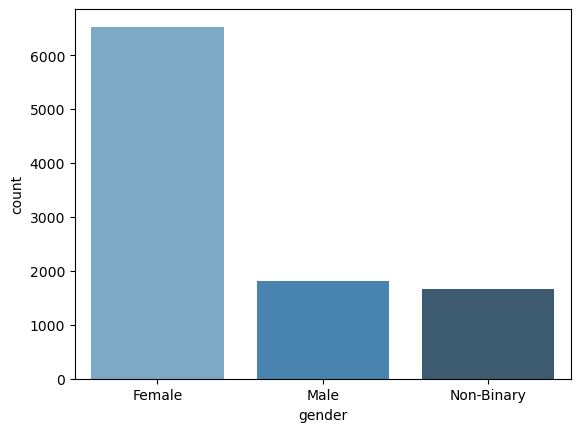

In [64]:
sns.countplot(x = 'gender', data = df, palette='Blues_d', hue = 'gender')

<AxesSubplot:xlabel='device_type', ylabel='count'>

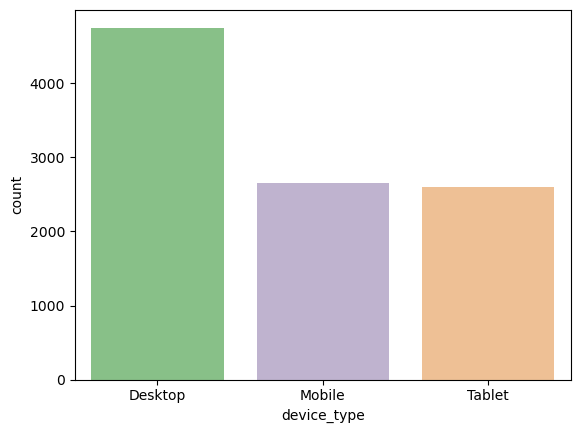

In [66]:
sns.countplot(x = 'device_type', data = df, palette='Accent', hue = 'device_type')

<AxesSubplot:xlabel='ad_position', ylabel='count'>

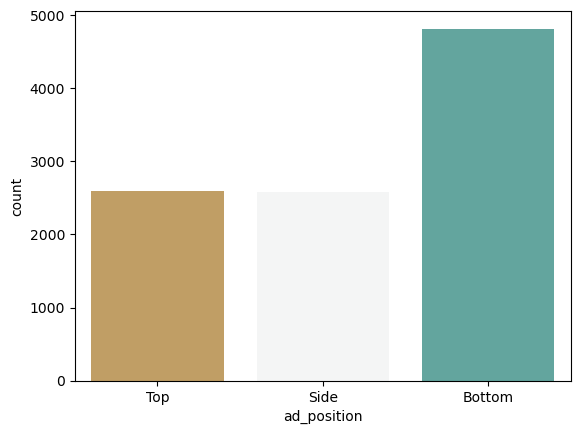

In [67]:
sns.countplot(x = 'ad_position', data = df, palette='BrBG', hue = 'ad_position')

<AxesSubplot:xlabel='time_of_day', ylabel='count'>

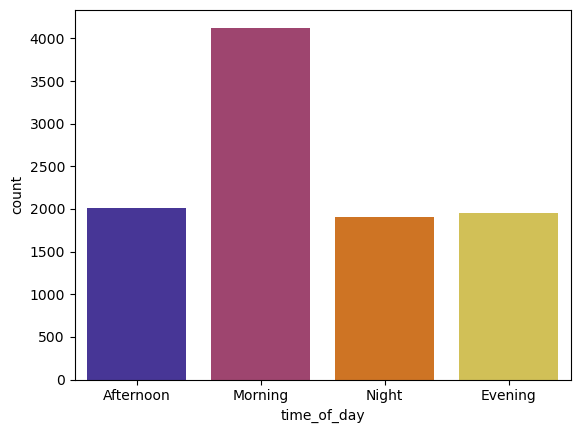

In [69]:
sns.countplot(x = 'time_of_day', data = df, palette='CMRmap', hue = 'time_of_day')

<AxesSubplot:xlabel='browsing_history', ylabel='count'>

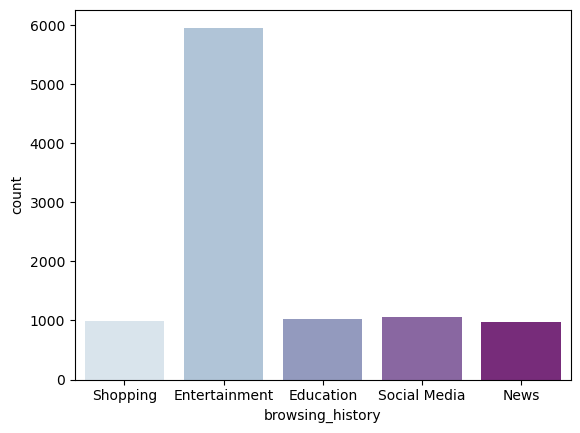

In [70]:
sns.countplot(x = 'browsing_history', data = df, palette='BuPu', hue = 'browsing_history')

In [35]:
#vedem elementele unice din fiecare coloana
df['gender'].unique()
LabelEncoder = LabelEncoder()
df['gender'] = LabelEncoder.fit_transform(df['gender'])
#Female -> 0, #Male -> 1, #Non-Binary -> 2
df.head(20)


,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,User670,22.0,0,Desktop,Top,Shopping,Afternoon,1
1,User3044,39.5,1,Desktop,Top,Entertainment,Morning,1
2,User5912,41.0,2,Desktop,Side,Education,Night,1
3,User5418,34.0,1,Desktop,Bottom,Entertainment,Evening,1
4,User9452,39.0,2,Desktop,Bottom,Social Media,Morning,0
5,User5942,39.5,2,Desktop,Bottom,Social Media,Evening,1
6,User7808,26.0,0,Desktop,Top,Entertainment,Morning,1
7,User5065,40.0,1,Mobile,Side,Entertainment,Evening,0
8,User7993,39.5,2,Mobile,Bottom,Social Media,Morning,1
9,User4509,39.5,0,Desktop,Bottom,Education,Afternoon,1


In [37]:
print(df['device_type'].unique())
df['device_type'] = LabelEncoder.fit_transform(df['device_type'])
#Desktop -> 0, Mobile -> 1, Tablet -> 2
df.head(20)

[0 1 2]


,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,User670,22.0,0,0,Top,Shopping,Afternoon,1
1,User3044,39.5,1,0,Top,Entertainment,Morning,1
2,User5912,41.0,2,0,Side,Education,Night,1
3,User5418,34.0,1,0,Bottom,Entertainment,Evening,1
4,User9452,39.0,2,0,Bottom,Social Media,Morning,0
5,User5942,39.5,2,0,Bottom,Social Media,Evening,1
6,User7808,26.0,0,0,Top,Entertainment,Morning,1
7,User5065,40.0,1,1,Side,Entertainment,Evening,0
8,User7993,39.5,2,1,Bottom,Social Media,Morning,1
9,User4509,39.5,0,0,Bottom,Education,Afternoon,1


In [40]:
print(df['ad_position'].unique())
df['ad_position'] = LabelEncoder.fit_transform(df['ad_position'])
#Bottom -> 0, Side -> 1, Top -> 2
df.head()

[2 1 0]


,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,User670,22.0,0,0,2,Shopping,Afternoon,1
1,User3044,39.5,1,0,2,Entertainment,Morning,1
2,User5912,41.0,2,0,1,Education,Night,1
3,User5418,34.0,1,0,0,Entertainment,Evening,1
4,User9452,39.0,2,0,0,Social Media,Morning,0


In [ ]:
print(df['browsing_history'].unique())
df['browsing_history'] = LabelEncoder.fit_transform(df['browsing_history'])
#Education -> 0, Entertainment -> 1, News -> 2, Shopping -> 3, Social Media -> 4
df.head(20)

[3 1 0 4 2]


,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,User670,22.0,0,0,2,3,Afternoon,1
1,User3044,39.5,1,0,2,1,Morning,1
2,User5912,41.0,2,0,1,0,Night,1
3,User5418,34.0,1,0,0,1,Evening,1
4,User9452,39.0,2,0,0,4,Morning,0
5,User5942,39.5,2,0,0,4,Evening,1
6,User7808,26.0,0,0,2,1,Morning,1
7,User5065,40.0,1,1,1,1,Evening,0
8,User7993,39.5,2,1,0,4,Morning,1
9,User4509,39.5,0,0,0,0,Afternoon,1


In [ ]:
print(df['time_of_day'].unique())
df['time_of_day'] = LabelEncoder.fit_transform(df['time_of_day'])
#Afternoon -> 0, Evening -> 1, Morning -> 2, Night -> 3
df.head(20)

['Afternoon' 'Morning' 'Night' 'Evening']


,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,User670,22.0,0,0,2,3,0,1
1,User3044,39.5,1,0,2,1,2,1
2,User5912,41.0,2,0,1,0,3,1
3,User5418,34.0,1,0,0,1,1,1
4,User9452,39.0,2,0,0,4,2,0
5,User5942,39.5,2,0,0,4,1,1
6,User7808,26.0,0,0,2,1,2,1
7,User5065,40.0,1,1,1,1,1,0
8,User7993,39.5,2,1,0,4,2,1
9,User4509,39.5,0,0,0,0,0,1


<h3>EDA

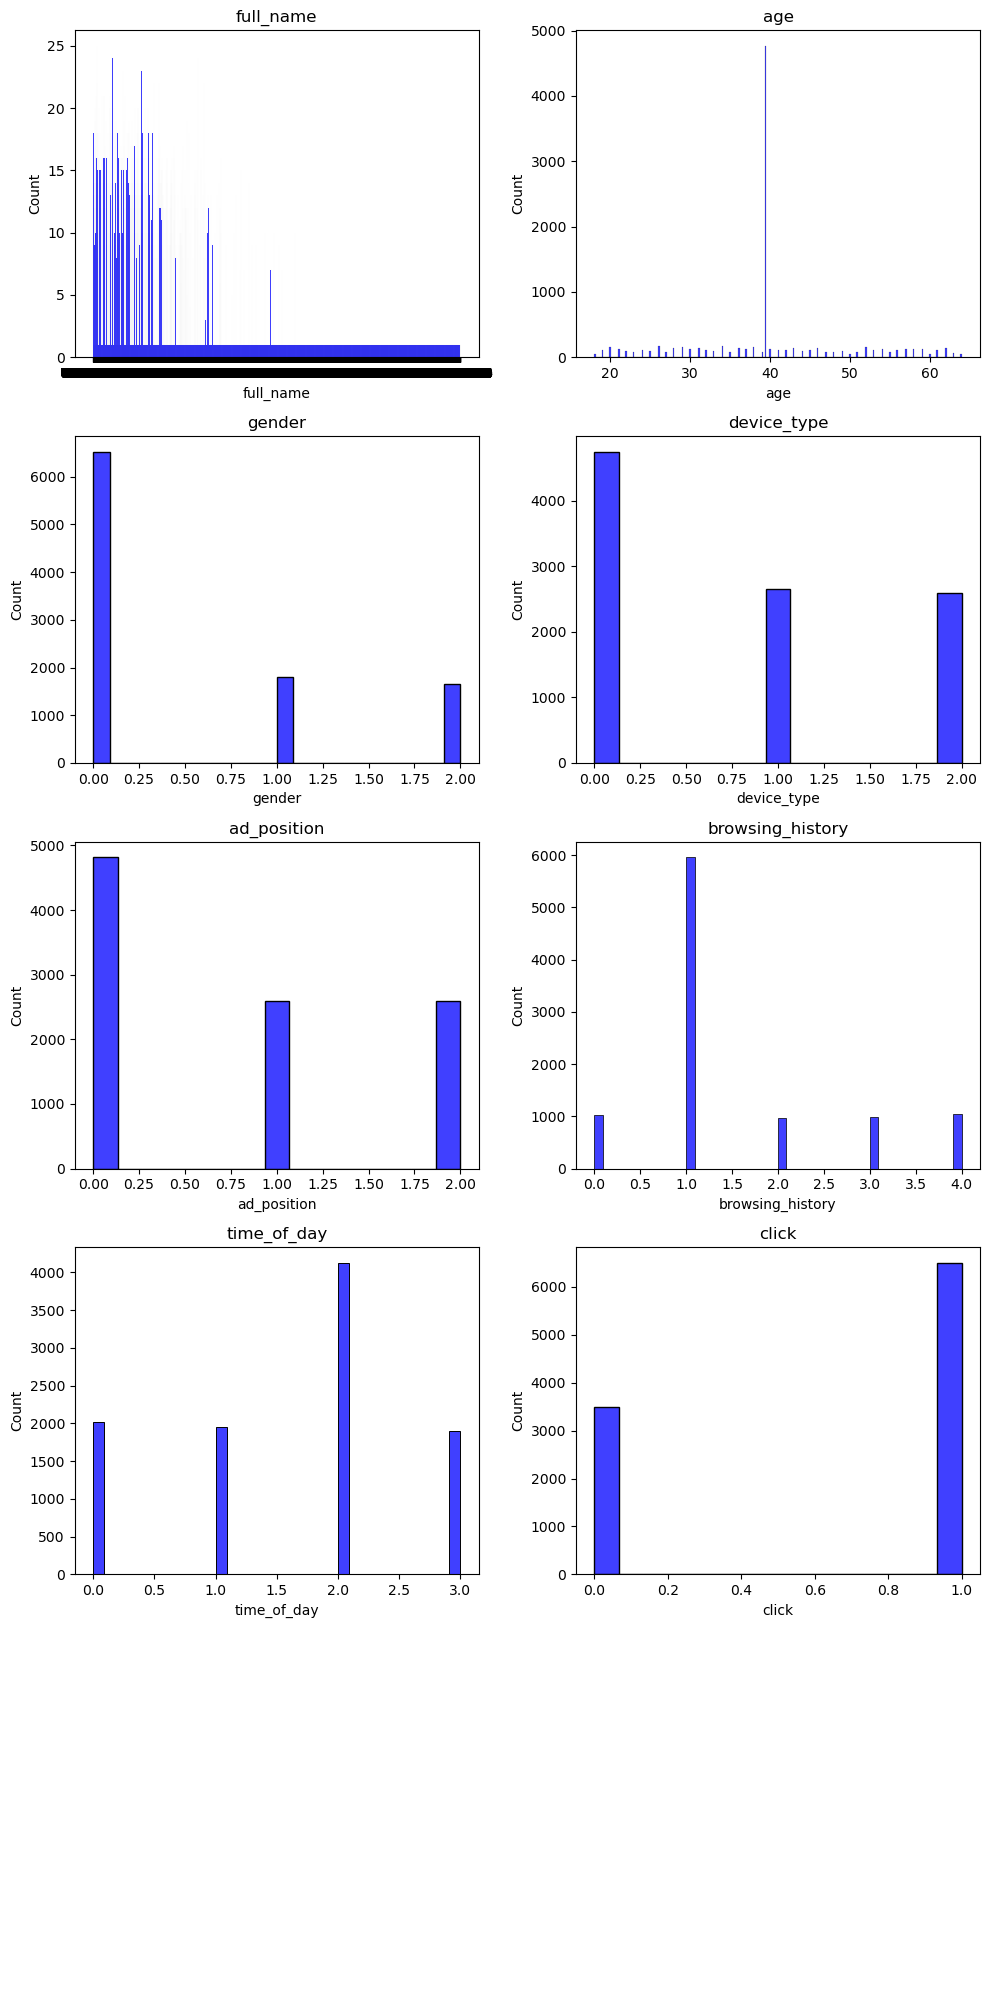

In [ ]:
#subplots pentru histurile fiecarei coloane
fig, axes = plt.subplots(4, 2, figsize = (10, 20))
#iterare prin fiecare coloana + adaugarea ei intr-un subplot
for i, ax in enumerate(axes.flatten()):
    if i < len(df.columns):
        sns.histplot(df.iloc[:, i], ax = ax, color = "blue")
        ax.set_title(df.columns[i])
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

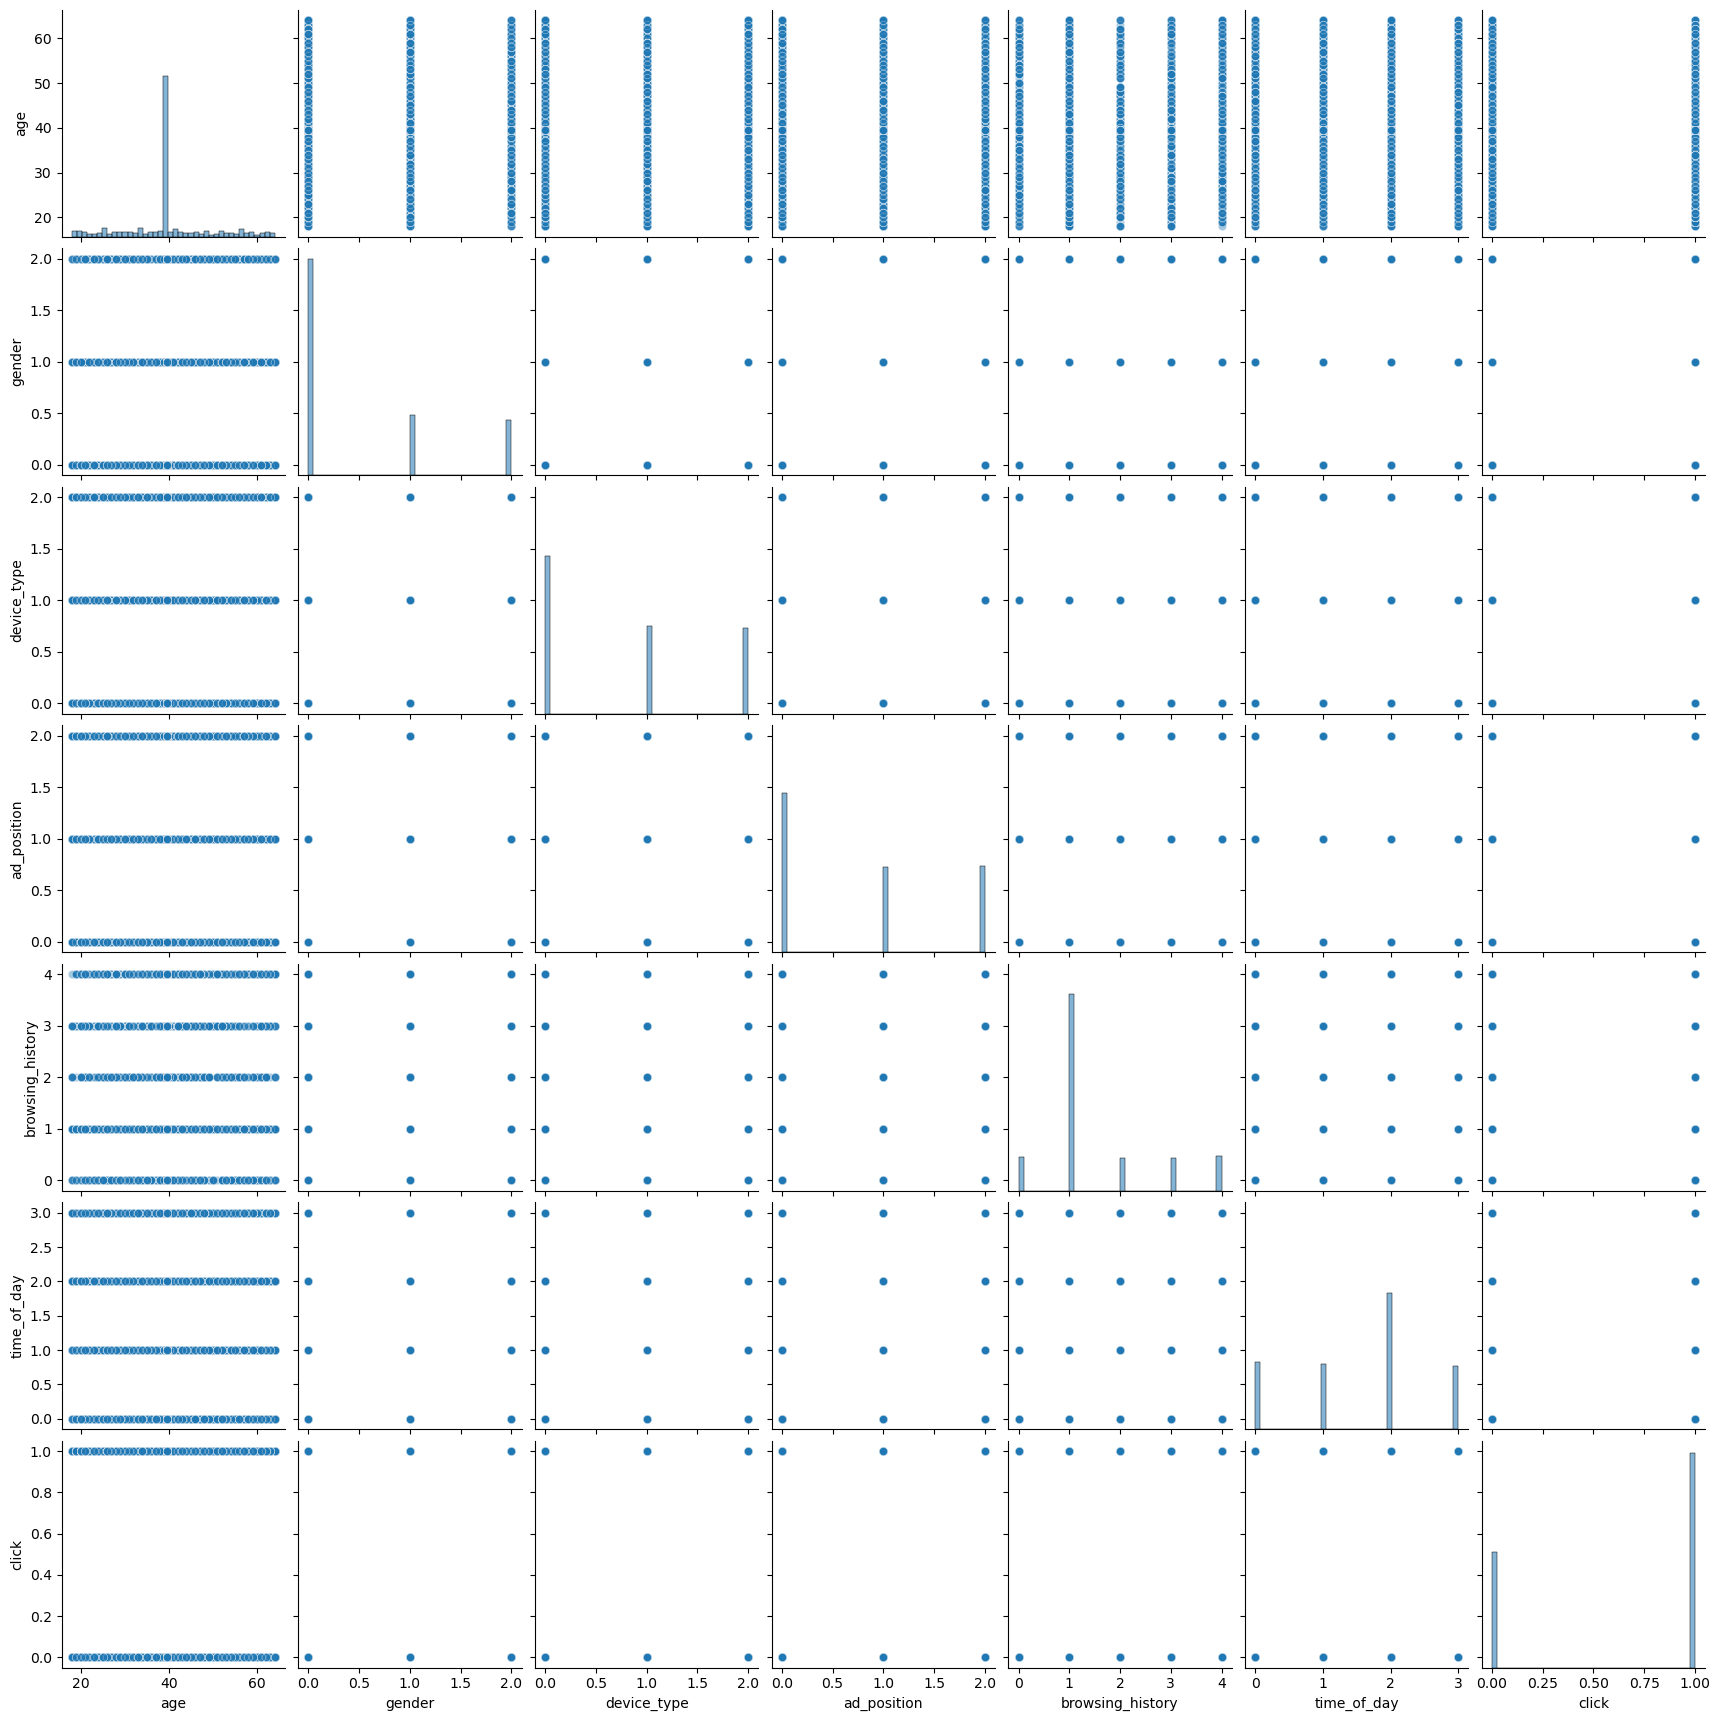

In [50]:
sns.pairplot(data = df, plot_kws={'alpha': 0.4}, diag_kws={'alpha': 0.55, 'bins' : 40})